<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Visión por Computadora I - TP 2

Implementar la función `create_gauss_filter (h, w, k_size, sigma)` para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro a una imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper **"Image Sharpness Measure for Blurred Images in Frequency Domain”** comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper **“Analysis of focus measure operators in shape from focus”**.

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [40]:
def create_gauss_filter(h,w,k_size,_sigma):
    # Primero obtenemos el kernel-1D y lo multiplicamos por su traspuesto para obtener el kernel-2D
    kernel_1d = cv.getGaussianKernel(ksize=k_size, sigma=_sigma) 
    kernel_2d = kernel_1d * kernel_1d.T

    # Luego, obtenemos el filtro haciendo el padding del kernel para igualar el tamaño de la imagen original
    gaussian_filter = np.zeros((h,w), dtype=np.float32)
    origin_x = int((h - k_size) / 2)
    origin_y = int((w - k_size) / 2)
    gaussian_filter[origin_x:origin_x+k_size, origin_y:origin_y+k_size] += kernel_2d

    # Finalmente, devolvemos el filtro y su transformada de fourier, tomando el modulo y descartando la parte imaginaria
    fourier_gaussian_filter =  abs(np.fft.fft2(gaussian_filter))
    return gaussian_filter, fourier_gaussian_filter

### **Graficamos ambas representaciones**

In [44]:
gf, fgf = create_gauss_filter(200,400,6,1.5)

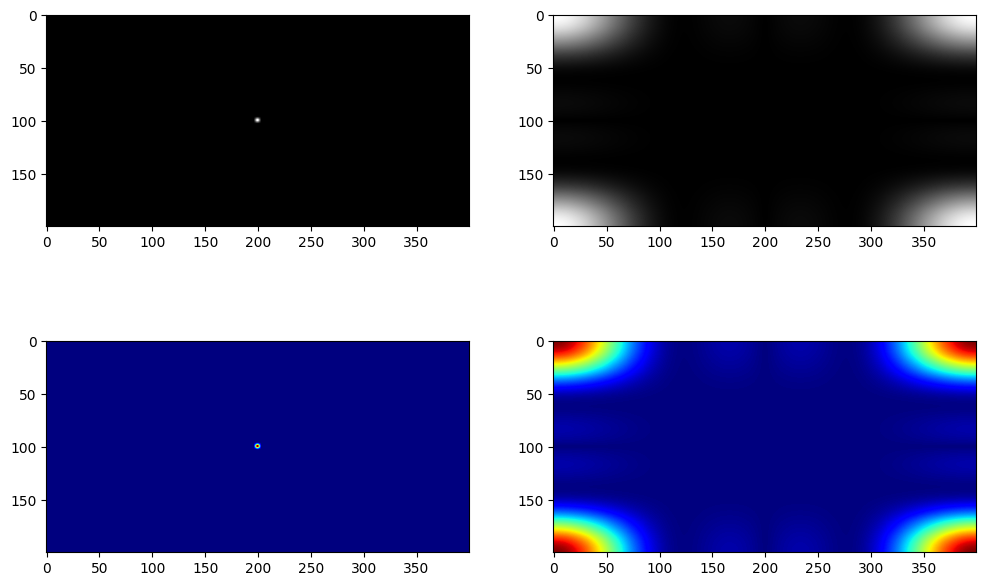

In [47]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.imshow(gf, cmap='gray')
plt.subplot(3,2,2)
plt.imshow(fgf, cmap='gray')

plt.subplot(3,2,3)
plt.imshow(gf, cmap='jet')
plt.subplot(3,2,4)
plt.imshow(fgf, cmap='jet')